In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar los datos
base = pd.read_excel("C:/Users/wilme/Documents/Maestria/Proyecto Capstone/base_eventos.xlsx")
base.head()

,FECHA DEL EVENTO,AÑO,MES,PROVINCIA,CODIFICACION PROVINCIAL,EVENTO,CAUSA,CATEGORIA DEL EVENTO,CALIFICACION EVENTO PELIGROSO,NUM EVENTOS
0,2010-01-07,2010,1,Tungurahua,18,ACTIVIDAD VOLCÁNICA,PROCESO ERUPTIVO,NATURAL,Nivel 1,1
1,2010-01-08,2010,1,Galápagos,20,TORMENTA ELÉCTRICA,CONDICIONES ATMOSFÉRICAS,ÉPOCA LLUVIOSA,Nivel 1,2
2,2010-01-20,2010,1,Esmeraldas,8,INUNDACIÓN,LLUVIAS,ÉPOCA LLUVIOSA,Nivel 2,1
3,2010-02-06,2010,2,Manabí,13,INUNDACIÓN,LLUVIAS,ÉPOCA LLUVIOSA,Nivel 1,1
4,2010-02-06,2010,2,Santo Domingo De Los Tsáchilas,23,INUNDACIÓN,LLUVIAS,ÉPOCA LLUVIOSA,Nivel 1,1


In [3]:
year_to_remove = 2023  # Año que quieres eliminar
data = base[base['AÑO'] != year_to_remove]

provincia_seleccionada = 'Azuay'
data1 = data[data['PROVINCIA'] == provincia_seleccionada]

# Convertir la columna 'FECHA DEL EVENTO' a datetime
data1['FECHA DEL EVENTO'] = pd.to_datetime(data1['FECHA DEL EVENTO'])

# Crear una columna 'AÑO_MES' para agrupar por año y mes
data1['AÑO_MES'] = data1['FECHA DEL EVENTO'].dt.to_period('M')

# Agrupar los datos por 'AÑO_MES' y contar el número de eventos en cada mes
events_per_month = data1.groupby('AÑO_MES').size()

# Mostrar las primeras filas de la serie temporal resultante
events_per_month


C:\Users\wilme\AppData\Local\Temp\ipykernel_13968\2537100468.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['FECHA DEL EVENTO'] = pd.to_datetime(data1['FECHA DEL EVENTO'])
C:\Users\wilme\AppData\Local\Temp\ipykernel_13968\2537100468.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['AÑO_MES'] = data1['FECHA DEL EVENTO'].dt.to_period('M')


AÑO_MES
2010-03     1
2010-06     1
2010-07     2
2010-08     2
2010-09     1
           ..
2022-08    25
2022-09    35
2022-10    28
2022-11    27
2022-12    30
Freq: M, Length: 149, dtype: int64

In [4]:
from statsmodels.tsa.stattools import adfuller
# Realizar la prueba de Dickey-Fuller aumentada para verificar la estacionariedad
adf_test_events = adfuller(events_per_month)

# Interpretar los resultados de la prueba de Dickey-Fuller
print(f'ADF Statistic: {adf_test_events[0]}')
print(f'p-value: {adf_test_events[1]}')
for key, value in adf_test_events[4].items():
    print(f'Critical Values {key}: {value}')

# Si el p-value es menor que 0.05, podemos rechazar la hipótesis nula de que la serie tiene una raíz unitaria (es no estacionaria).


ADF Statistic: -5.431909504074079
p-value: 2.9018592868155674e-06
Critical Values 1%: -3.4753253063120644
Critical Values 5%: -2.881274703275226
Critical Values 10%: -2.5772928360116873


In [5]:
#events_per_month_diff=events_per_month.diff(1).bfill()

In [6]:
#adf_test_events_diff = adfuller(events_per_month_diff)
#
## Interpretar los resultados de la prueba de Dickey-Fuller
#print(f'ADF Statistic: {adf_test_events_diff[0]}')
#print(f'p-value: {adf_test_events_diff[1]}')
#for key, value in adf_test_events_diff[4].items():
#    print(f'Critical Values {key}: {value}')

<Figure size 1200x600 with 0 Axes>

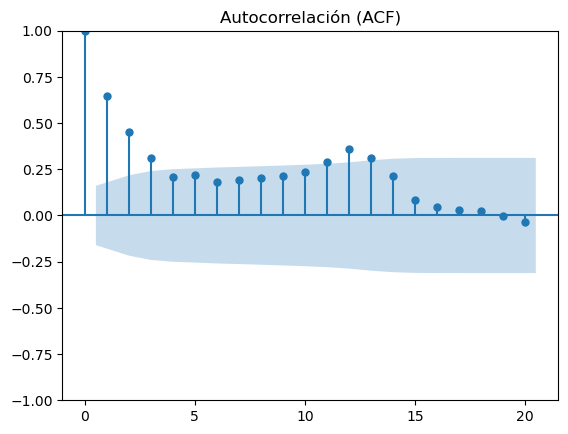

<Figure size 1200x600 with 0 Axes>

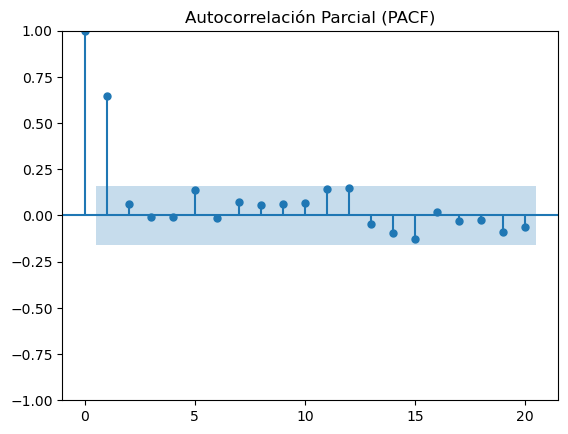

In [7]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Graficar la función de autocorrelación (ACF)
plt.figure(figsize=(12, 6))
plot_acf(events_per_month, lags=20, alpha=0.05)
plt.title('Autocorrelación (ACF)')
plt.show()

# Graficar la función de autocorrelación parcial (PACF)
plt.figure(figsize=(12, 6))
plot_pacf(events_per_month, lags=20, alpha=0.05)
plt.title('Autocorrelación Parcial (PACF)')
plt.show()

In [28]:
from statsmodels.tsa.arima.model import ARIMA

# Ajustar un modelo ARIMA con los parámetros identificados
model_arima_events = ARIMA(events_per_month, order=(1, 0, 0))
results_arima_events = model_arima_events.fit()

# Mostrar el resumen del modelo ARIMA ajustado
results_arima_events.summary()

C:\Users\wilme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\wilme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\wilme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  149
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -485.679
Date:                Sat, 24 Feb 2024   AIC                            977.358
Time:                        22:42:04   BIC                            986.370
Sample:                             0   HQIC                           981.020
                                - 149                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.5494      1.654      8.799      0.000      11.308      17.790
ar.L1          0.6681      0.067     10.044      0.000       0.538       0.798
sigma2        39.5411      5.325      7.425      0.000      29.104      49.979
===================================================================================
Ljung-Box (L1) (Q):                   0.47   Jarque-Bera (JB):                 5.75
Prob(Q):                              0.49   Prob(JB):                         0.06
Heteroskedasticity (H):               1.63   Skew:                             0.47
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

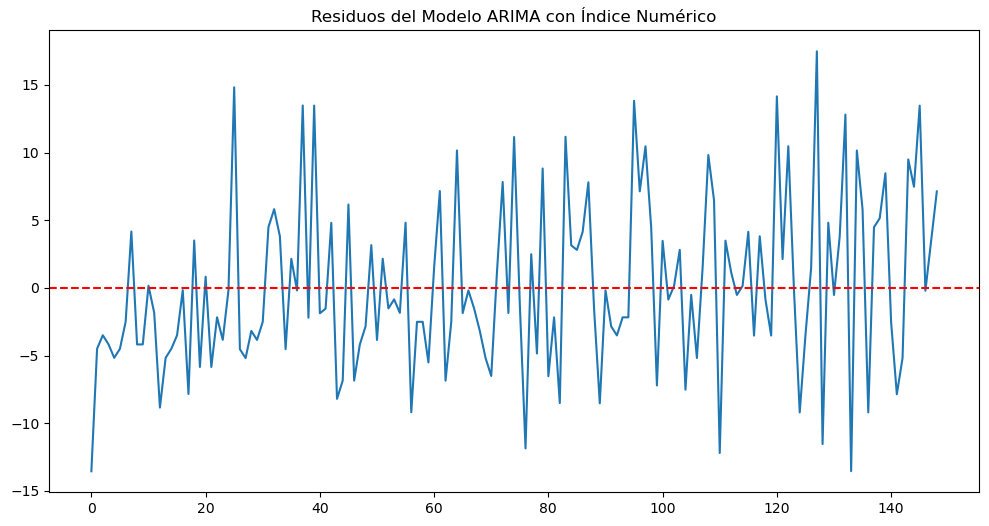

<Figure size 1200x600 with 0 Axes>

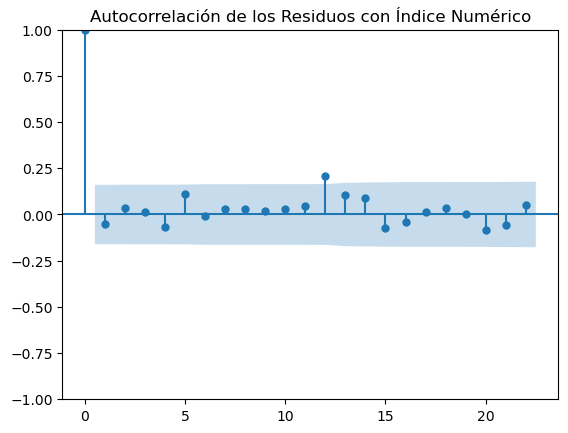

In [29]:
# Reindexar la serie de residuos con un rango numérico para facilitar la visualización
residuals = results_arima_events.resid
residuals_indexed = residuals.reset_index(drop=True)

# Gráfico de los residuos con índice numérico
plt.figure(figsize=(12, 6))
plt.plot(residuals_indexed)
plt.title('Residuos del Modelo ARIMA con Índice Numérico')
plt.axhline(0, linestyle='--', color='red')
plt.show()

# Función de autocorrelación de los residuos con índice numérico
plt.figure(figsize=(12, 6))
plot_acf(residuals_indexed, alpha=0.05)
plt.title('Autocorrelación de los Residuos con Índice Numérico')
plt.show()


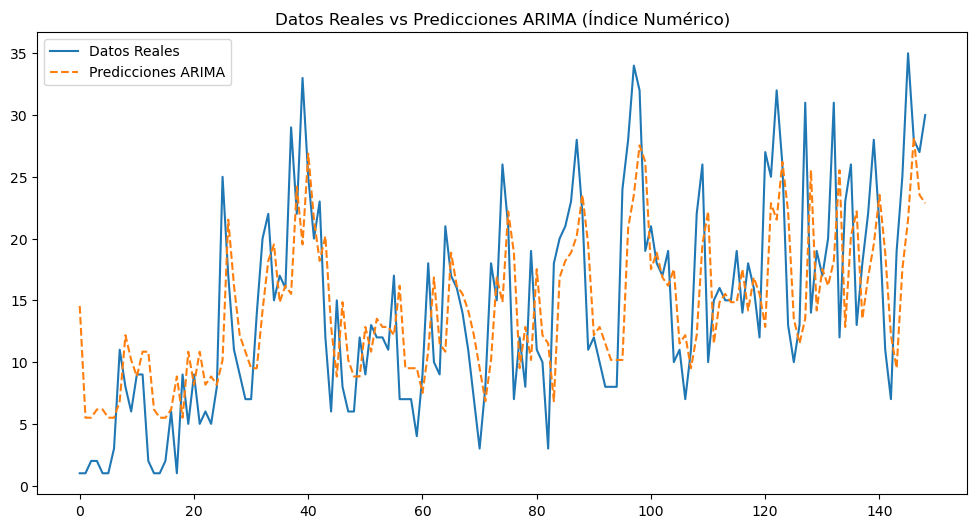

In [30]:
# Convertir el índice de 'events_per_month' y 'predictions' a un rango numérico para la visualización
events_per_month_indexed = events_per_month.reset_index(drop=True)
predictions = results_arima_events.predict(start=events_per_month.index[0], end=events_per_month.index[-1])
predictions_indexed = predictions.reset_index(drop=True)

# Gráfico de los datos reales vs las predicciones con índice numérico
plt.figure(figsize=(12, 6))
plt.plot(events_per_month_indexed, label='Datos Reales')
plt.plot(predictions_indexed, label='Predicciones ARIMA', linestyle='--')
plt.title('Datos Reales vs Predicciones ARIMA (Índice Numérico)')
plt.legend()
plt.show()


ValueError: x and y must have same first dimension, but have shapes (23,) and (24,)

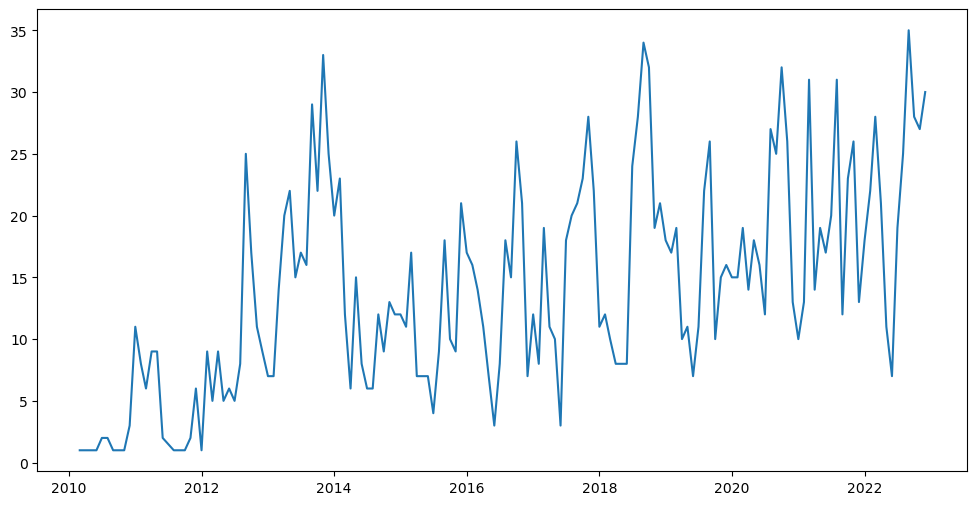

In [17]:
import pandas as pd

# Suponiendo que 'events_per_month' es tu serie temporal
# Convertir el índice de PeriodIndex a DateTimeIndex si aún no se ha hecho
events_per_month.index = events_per_month.index.to_timestamp()

# Ajustar el modelo ARIMA como antes
from statsmodels.tsa.arima.model import ARIMA

# Asumiendo que ya tienes el modelo ajustado, continuamos desde la generación de predicciones
n_periods = 24  # Número de periodos que quieres predecir hacia el futuro

# Generar fechas futuras para las predicciones
start = events_per_month.index[-1] + pd.DateOffset(months=1)
end = start + pd.DateOffset(months=n_periods - 1)

# Generar predicciones futuras
forecast = results_arima_events.get_forecast(steps=n_periods)

# Obtener el pronóstico y los intervalos de confianza
forecast_pred = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Para graficar, asegúrate de que las fechas de las predicciones sean compatibles
pred_dates = pd.date_range(start=start, end=end, freq='M')

# Visualizar las predicciones y los intervalos de confianza
plt.figure(figsize=(12, 6))
plt.plot(events_per_month.index, events_per_month, label='Datos Históricos')
plt.plot(pred_dates, forecast_pred, label='Predicciones Futuras', color='red')
plt.fill_between(pred_dates, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Predicciones Futuras de Eventos Peligrosos')
plt.legend()
plt.show()


In [18]:
# Acceder a los valores predichos y convertirlos a un array de NumPy
forecast_values = forecast_pred.to_numpy()

# Acceder a los intervalos de confianza y convertirlos también a arrays de NumPy
lower_bounds = forecast_conf_int.iloc[:, 0].to_numpy()
upper_bounds = forecast_conf_int.iloc[:, 1].to_numpy()

# Mostrar los valores predichos y los intervalos de confianza
print("Valores Predichos:", forecast_values)
print("Intervalos de Confianza - Límite Inferior:", lower_bounds)
print("Intervalos de Confianza - Límite Superior:", upper_bounds)


Valores Predichos: [26.31652424 24.43227749 23.46840911 22.97535147 22.72313256 22.59411239
 22.52811336 22.49435219 22.47708198 22.46824758 22.46372842 22.46141669
 22.46023415 22.45962923 22.45931979 22.45916149 22.45908052 22.4590391
 22.45901791 22.45900707 22.45900153 22.45899869 22.45899724 22.4589965 ]
Intervalos de Confianza - Límite Inferior: [14.21431293 10.41311357  8.74310731  7.9084543   7.44738329  7.1645495
  6.96983141  6.81961872  6.6922533   6.57682821  6.46780867  6.36237281
  6.25907642  6.1571769   6.05628967  5.95621295  5.85683846  5.75810585
  5.65997935  5.56243591  5.46545912  5.36903606  5.27315574  5.17780828]
Intervalos de Confianza - Límite Superior: [38.41873554 38.45144141 38.19371091 38.04224864 37.99888183 38.02367529
 38.08639532 38.16908565 38.26191067 38.35966695 38.45964817 38.56046057
 38.66139187 38.76208155 38.8623499  38.96211004 39.06132258 39.15997235
 39.25805648 39.35557823 39.45254394 39.54896133 39.64483874 39.74018472]


In [19]:
import pandas as pd

# Asumiendo que 'pred_dates' es un array de fechas de tus predicciones futuras
# y que ya tienes 'forecast_values', 'lower_bounds', y 'upper_bounds'
pred_dates = pd.date_range(start=events_per_month.index[-1] + pd.DateOffset(months=1), periods=n_periods, freq='M')

# Crear un DataFrame para contener los periodos, las predicciones y los intervalos de confianza
forecast_df = pd.DataFrame({
    'Fecha': pred_dates,
    'Predicción': forecast_values,
    'Límite Inferior': lower_bounds,
    'Límite Superior': upper_bounds
})

# Establecer la fecha como el índice del DataFrame si lo prefieres
forecast_df.set_index('Fecha', inplace=True)

# Mostrar el DataFrame resultante
print(forecast_df)


            Predicción  Límite Inferior  Límite Superior
Fecha                                                   
2023-01-31   26.316524        14.214313        38.418736
2023-02-28   24.432277        10.413114        38.451441
2023-03-31   23.468409         8.743107        38.193711
2023-04-30   22.975351         7.908454        38.042249
2023-05-31   22.723133         7.447383        37.998882
2023-06-30   22.594112         7.164550        38.023675
2023-07-31   22.528113         6.969831        38.086395
2023-08-31   22.494352         6.819619        38.169086
2023-09-30   22.477082         6.692253        38.261911
2023-10-31   22.468248         6.576828        38.359667
2023-11-30   22.463728         6.467809        38.459648
2023-12-31   22.461417         6.362373        38.560461
2024-01-31   22.460234         6.259076        38.661392
2024-02-29   22.459629         6.157177        38.762082
2024-03-31   22.459320         6.056290        38.862350
2024-04-30   22.459161         

In [20]:
# Asegurarse de que el índice sea de tipo DateTimeIndex
# Si 'Fecha' no es el índice, primero convertirlo a índice y asegurarse de que es de tipo DateTime
if not isinstance(forecast_df.index, pd.DatetimeIndex):
    forecast_df.set_index('Fecha', inplace=True)

# Convertir el índice a DateTimeIndex si aún no lo es
forecast_df.index = pd.to_datetime(forecast_df.index)

# Agrupar por año y sumar las predicciones y límites para cada año
summed_forecast_by_year = forecast_df.resample('Y').sum()
summed_forecast_by_year_int = summed_forecast_by_year.astype(int) 
summed_forecast_by_year_rounded = summed_forecast_by_year.round()

# Mostrar el resultado
print(summed_forecast_by_year)
print(summed_forecast_by_year_int)
print(summed_forecast_by_year_rounded)


            Predicción  Límite Inferior  Límite Superior
Fecha                                                   
2023-12-31  277.402747        95.779634       459.025861
2024-12-31  269.510483        68.551575       470.469392
            Predicción  Límite Inferior  Límite Superior
Fecha                                                   
2023-12-31         277               95              459
2024-12-31         269               68              470
            Predicción  Límite Inferior  Límite Superior
Fecha                                                   
2023-12-31       277.0             96.0            459.0
2024-12-31       270.0             69.0            470.0
